# Vehicle Insurance Claim Fraud Detection Using Machine Learning

In this project, our goal is to build a machine learning model to detect the fraud exists in vehicle insurance claims. We will test different learning approches and try to optimize our algorithms to increase the accuracy and applicability in real-life situations.

## Load the Data

First, we load the data and several modules.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import io
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Store dataset in a Pandas Dataframe
from google.colab import files
uploaded = files.upload()

Saving fraud_oracle.csv to fraud_oracle.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['fraud_oracle.csv']), skipinitialspace=True)

## Data visualization and preprocessing

Our data consists of several categorical features. Will will apply one-hot coding or mapping to convert those data into numerical data.

In [ ]:
df.head(10)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,more than 69000,0,6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,more than 69000,0,8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,more than 69000,0,9,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,42,Policy Holder,Utility - All Perils,Utility,more than 69000,0,10,7,400,1,more than 30,more than 30,2 to 4,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
categorical_c = [col for col in df.columns if df[col].dtypes == "O"]
print(categorical_c)

['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'BasePolicy']


We implement one-hot coding here.

In [ ]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Month', 'DayOfWeek', 'Make', 
                                               'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 
                                               'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 
                                               'AgentType', 'BasePolicy'], prefix = ['Month', 'DayOfWeek', 
                                                                                     'Make', 'AccidentArea', 'DayOfWeekClaimed', 
                                                                                     'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 
                                                                                     'PolicyType', 'VehicleCategory', 'AgentType', 'BasePolicy'])

We map categorical values directly to numerical values here.

In [ ]:
v = df_onehot['VehiclePrice'].replace(['less than 20000','20000 to 29000','30000 to 39000','40000 to 59000',
                                         '60000 to 69000','more than 69000'],[1,2,3,4,5,6])
df_onehot['VehiclePrice'] = v

d = df_onehot['Days_Policy_Accident'].replace(['none','1 to 7','8 to 15','15 to 30',
                                         'more than 30'],[0,4,12,23,50])
df_onehot['Days_Policy_Accident'] = d

d1 = df_onehot['Days_Policy_Claim'].replace(['none','8 to 15','15 to 30','more than 30'],[0,12,23,50])
df_onehot['Days_Policy_Claim'] = d1

p = df_onehot['PastNumberOfClaims'].replace(['none','1','2 to 4','more than 4'],[0,1,3,8])
df_onehot['PastNumberOfClaims'] = p

a = df_onehot['AgeOfVehicle'].replace(['new','2 years','3 years','4 years','5 years','6 years','7 years','more than 7',],[0,2,3,4,5,6,7,10])
df_onehot['AgeOfVehicle'] = a

a1 = df_onehot['AgeOfPolicyHolder'].replace(['16 to 17','18 to 20','21 to 25','26 to 30','31 to 35','36 to 40',
                                             '41 to 50','51 to 65','over 65',],[16,19,23,28,33,38,46,58,80])
df_onehot['AgeOfPolicyHolder'] = a1

p = df_onehot['PoliceReportFiled'].replace(['No','Yes'],[0,1])
df_onehot['PoliceReportFiled'] = p

w = df_onehot['WitnessPresent'].replace(['No','Yes'],[0,1])
df_onehot['WitnessPresent'] = w

n = df_onehot['NumberOfSuppliments'].replace(['none','1 to 2','3 to 5','more than 5'],[0,2,4,8])
df_onehot['NumberOfSuppliments'] = n

a = df_onehot['AddressChange_Claim'].replace(['no change','1 year','2 to 3 years','4 to 8 years','under 6 months'],[0,1,3,6,0.3])
df_onehot['AddressChange_Claim'] = a

n = df_onehot['NumberOfCars'].replace(['1 vehicle','2 vehicles','3 to 4','5 to 8','more than 8'],[1,2,4,7,10])
df_onehot['NumberOfCars'] = n

df_onehot.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_Accura,...,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_0,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Policy Holder,Fault_Third Party,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,6,0,1,12,300,1,50,50,0,3,28,0,0,0,1.0,4,1994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1,3,4,34,6,0,2,15,400,4,50,50,0,6,33,1,0,0,0.0,1,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,5,2,47,6,0,3,7,400,3,50,50,1,7,46,0,0,0,0.0,1,1994,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
3,2,1,65,2,0,4,4,400,2,50,50,1,10,58,1,0,8,0.0,1,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,5,2,27,6,0,5,3,400,1,50,50,0,5,33,0,0,0,0.0,1,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


Choose the target variable 'FraudFound_P' and independent variables.

In [ ]:
xnames = df_onehot.columns.tolist()[:-1]
xnames.remove('FraudFound_P')

X = np.array(df_onehot[xnames])
y = np.array(df_onehot["FraudFound_P"])

Then, we split and scale the data.

In [ ]:
Xtr,Xts,ytr,yts = train_test_split(X, y, test_size=0.4)

In [ ]:
xscal = StandardScaler()
Xtr1 = xscal.fit_transform(Xtr)
Xts1 = xscal.transform(Xts)

## Logistic Regression

Start by doing a regular logistic regression.

In [ ]:
logreg = LogisticRegression(C=1e5, solver='liblinear')
logreg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, solver='liblinear')

In [ ]:
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

Accuracy on test data = 0.939689


The accuracy of the first logistic learning is not bad, but we realize a false negative issue after we print out the confusion matrix.

[[0.999 0.011]
 [0.063 0.003]]


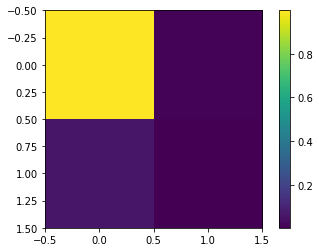

In [ ]:
C = confusion_matrix(yts,yhat)
Csum = np.sum(C,1)
C = C / Csum[None,:]
print(np.array_str(C, precision=3, suppress_small=True))
plt.imshow(C, interpolation='none')
plt.colorbar()

Since the accuracy does not give us precise information on how well our model predict the result, we will modify our evaluation metrics to include precision, recall, and f1-score into our evaluation.

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

        C = confusion_matrix(y_test,pred)
        Csum = np.sum(C,1)
        C = C / Csum[None,:]
        print(np.array_str(C, precision=3, suppress_small=True))
        plt.imshow(C, interpolation='none')
        plt.colorbar()

Train Result:
Accuracy Score: 93.99%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.940108    0.0  0.939905     0.470054      0.883815
recall        0.999770    0.0  0.939905     0.499885      0.939905
f1-score      0.969022    0.0  0.939905     0.484511      0.910998
support    8698.000000  554.0  0.939905  9252.000000   9252.000000
_______________________________________________
Confusion Matrix: 
 [[8696    2]
 [ 554    0]]

Test Result:
Accuracy Score: 93.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.940289    0.200000  0.939689     0.570144      0.896001
recall        0.999310    0.002710  0.939689     0.501010      0.939689
f1-score      0.968902    0.005348  0.939689     0.487125      0.911257
support    5799.000000  369.000000  0.939689  6168.000000   6168.0

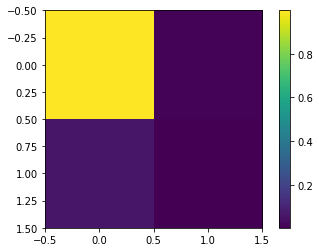

In [ ]:
print_score(logreg, Xtr1, ytr, Xts1, yts, train=True)
print_score(logreg, Xtr1, ytr, Xts1, yts, train=False)

We see that although the scores for 0 (no fraud) is high, the model predicts very poorly on fraud cases, indicating a high rate of false negative error.

## L1 regression

We will implement L1 logistic regression to see whether this will improve the result.

<StemContainer object of 3 artists>

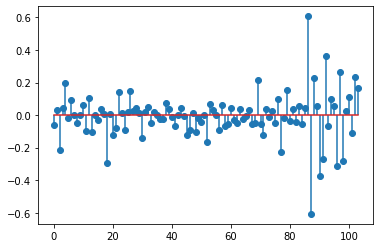

In [ ]:
W = logreg.coef_
W = W.ravel()
plt.stem(W,use_line_collection=True)

Accuracy on test data = 0.939689
[-5.48855731e-02  2.75131342e-02 -1.74705417e-01  4.38207667e-02
  1.62777325e-01 -1.70406847e-02  9.01514603e-02  0.00000000e+00
 -4.66020817e-02  0.00000000e+00  5.62708530e-02 -9.80977721e-02
  6.94076110e-02 -9.68007147e-02  1.21243700e-03 -2.91451009e-02
  3.83020387e-02  7.40412965e-03 -2.57521121e-01 -1.12773620e-02
 -1.19248392e-01 -9.80575148e-02  1.11117480e-01 -4.83784194e-03
 -9.08721819e-02  1.06286158e-03  1.19403887e-01  8.05024029e-03
  1.25527784e-02  0.00000000e+00 -1.33928679e-01  1.55583285e-02
  4.42151563e-02 -4.44209947e-02  1.90608523e-02  0.00000000e+00
 -2.13404624e-02 -2.08062924e-02  7.54655787e-02  3.84064623e-02
 -9.18831607e-03 -6.16615049e-02  0.00000000e+00  3.83921354e-02
  0.00000000e+00 -1.59005853e-02 -2.53828838e-02  8.71281334e-03
 -3.55272115e-02 -1.75202302e-02 -4.12565902e-02  1.01304231e-03
 -5.53689694e-02  6.47468661e-02  3.02733947e-02  0.00000000e+00
 -8.51788945e-02  1.68635422e-02 -1.10735559e-01 -1.79735

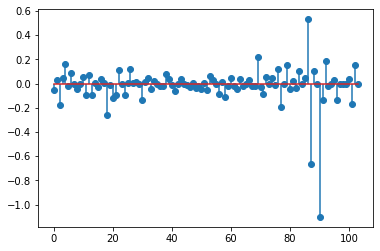

In [ ]:
reg = LogisticRegression(penalty = 'l1', solver='liblinear')
reg.fit(Xtr1, ytr)

yhat = reg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

W = reg.coef_
W = W.ravel()
plt.stem(W, use_line_collection=True)
print(W)

I = np.argsort(np.abs(W))[-2:]
print(I)
print("The names of the factors where the magnitude of W[i] is largest are {} and {}".format(xnames[I[1]], xnames[I[0]]))

Train Result:
Accuracy Score: 93.99%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.940108    0.0  0.939905     0.470054      0.883815
recall        0.999770    0.0  0.939905     0.499885      0.939905
f1-score      0.969022    0.0  0.939905     0.484511      0.910998
support    8698.000000  554.0  0.939905  9252.000000   9252.000000
_______________________________________________
Confusion Matrix: 
 [[8696    2]
 [ 554    0]]

Test Result:
Accuracy Score: 93.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.940289    0.200000  0.939689     0.570144      0.896001
recall        0.999310    0.002710  0.939689     0.501010      0.939689
f1-score      0.968902    0.005348  0.939689     0.487125      0.911257
support    5799.000000  369.000000  0.939689  6168.000000   6168.0

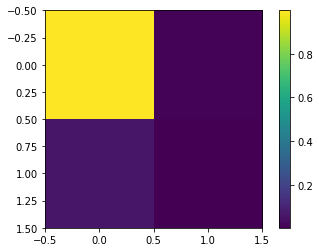

In [ ]:
print_score(reg, Xtr1, ytr, Xts1, yts, train=True)
print_score(reg, Xtr1, ytr, Xts1, yts, train=False)

In the test result, the precision, recall, and f1-score are all 0. From the confusion matrix, we spot no fraud classification by our model.

## SVM

Then, we implement SVM on our data, hoping to see a different result.

In [ ]:
svc = svm.SVC(C=1.0,kernel='rbf',gamma=0.1)

In [ ]:
svc.fit(Xtr1,ytr)

SVC(gamma=0.1)

Train Result:
Accuracy Score: 99.64%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.996220    1.000000  0.996433     0.998110      0.996447
recall        1.000000    0.940433  0.996433     0.970217      0.996433
f1-score      0.998107    0.969302  0.996433     0.983704      0.996382
support    8698.000000  554.000000  0.996433  9252.000000   9252.000000
_______________________________________________
Confusion Matrix: 
 [[8698    0]
 [  33  521]]



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Result:
Accuracy Score: 94.02%
_______________________________________________
CLASSIFICATION REPORT:
                     0      1  accuracy    macro avg  weighted avg
precision     0.940175    0.0  0.940175     0.470088      0.883929
recall        1.000000    0.0  0.940175     0.500000      0.940175
f1-score      0.969165    0.0  0.940175     0.484583      0.911185
support    5799.000000  369.0  0.940175  6168.000000   6168.000000
_______________________________________________
Confusion Matrix: 
 [[5799    0]
 [ 369    0]]

[[1.    0.   ]
 [0.064 0.   ]]


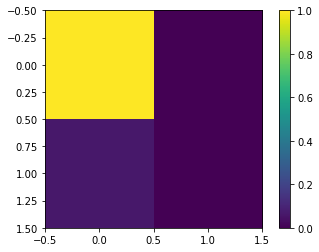

In [ ]:
print_score(svc, Xtr1, ytr, Xts1, yts, train=True)
print_score(svc, Xtr1, ytr, Xts1, yts, train=False)

The accuracy is higher than the result we get from Logistic Regression, but from the confusion matrix, we still see similar results. Our model classifies all cases as non-fraud ones. Although accuracy is very high, the precision, recall, and f1-score of the fraud cases group are all 0.

# Dealing with Imbalanced Dataset

From previous sections, we observe that no matter which techiniques we use, the high false negative error persists. We believe the error is generated because we have a very imbalaned dataset (923 positive vs. 14497 negative cases).

In the following part, we will try to implement several methods to deal with imbalanced dataset:

* Cost-Sensitive Learning
* Sampling Methods

## Cost-Sensitive Logistic Regression

The cost of missing a positive (minority) class is usually more critical than the incorrect classification of the negative (majority) class.

In our case, granting the insurance coverage to a good customer is not as bad as giving the compensation to a swindler.

Cost-sensitive learning for imbalanced classification is focused on first assigning different costs to the types of misclassification errors that can be made, then using specialized methods to take those costs into account.

Train Result:
Accuracy Score: 66.79%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.987520    0.138386  0.667856     0.562953      0.936674
recall        0.654978    0.870036  0.667856     0.762507      0.667856
f1-score      0.787586    0.238791  0.667856     0.513188      0.754724
support    8698.000000  554.000000  0.667856  9252.000000   9252.000000
_______________________________________________
Confusion Matrix: 
 [[5697 3001]
 [  72  482]]

Test Result:
Accuracy Score: 65.39%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.982868    0.128054  0.653859     0.555461      0.931729
recall        0.643042    0.823848  0.653859     0.733445      0.653859
f1-score      0.777442    0.221655  0.653859     0.499549      0.744192
support    5799.000000  369.000000  0.653

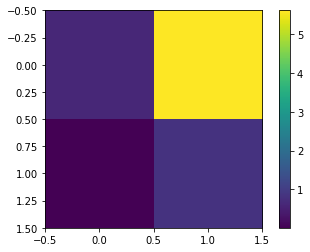

In [ ]:
logreg = LogisticRegression(class_weight='balanced', C=1e5, solver='liblinear')
logreg.fit(Xtr1, ytr)

print_score(logreg, Xtr1, ytr, Xts1, yts, train=True)
print_score(logreg, Xtr1, ytr, Xts1, yts, train=False)

## Random Sampling
1. Oversampling includes duplicating or synthesizing new samples from the minority class
2. Undersampling includes deleting or selecting only a sample of examples from the majority class
3. Synthetic Methods combine both oversampling and undersampling

We will first try several existing oversampling methods to test our result. 

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['fraud_oracle.csv']), skipinitialspace=True)

# A simple oversampling model

We will oversampling the dataset by hand first and then test the model on logistic regression and SVM

In [ ]:
from sklearn.utils import resample
 
# Put the majority class and minority class on separate dataframes
majority_df = df[df["FraudFound_P"]==0]
minority_df = df[df["FraudFound_P"]==1]
 
# Oversampling the minority class randomly
new_minority_df = resample( minority_df, replace = True, 
                            n_samples = len(majority_df), 
                            random_state = 0 )
 
# Combine the new minority class with the majority class
balanced_df = pd.concat([majority_df, new_minority_df])

In [ ]:
df_onehot = balanced_df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Month', 'DayOfWeek', 'Make', 
                                               'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 
                                               'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 
                                               'AgentType', 'BasePolicy'], prefix = ['Month', 'DayOfWeek', 
                                                                                     'Make', 'AccidentArea', 'DayOfWeekClaimed', 
                                                                                     'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 
                                                                                     'PolicyType', 'VehicleCategory', 'AgentType', 'BasePolicy'])

v = df_onehot['VehiclePrice'].replace(['less than 20000','20000 to 29000','30000 to 39000','40000 to 59000',
                                         '60000 to 69000','more than 69000'],[1,2,3,4,5,6])
df_onehot['VehiclePrice'] = v

d = df_onehot['Days_Policy_Accident'].replace(['none','1 to 7','8 to 15','15 to 30',
                                         'more than 30'],[0,4,12,23,50])
df_onehot['Days_Policy_Accident'] = d

d1 = df_onehot['Days_Policy_Claim'].replace(['none','8 to 15','15 to 30','more than 30'],[0,12,23,50])
df_onehot['Days_Policy_Claim'] = d1

p = df_onehot['PastNumberOfClaims'].replace(['none','1','2 to 4','more than 4'],[0,1,3,8])
df_onehot['PastNumberOfClaims'] = p

a = df_onehot['AgeOfVehicle'].replace(['new','2 years','3 years','4 years','5 years','6 years','7 years','more than 7',],[0,2,3,4,5,6,7,10])
df_onehot['AgeOfVehicle'] = a

a1 = df_onehot['AgeOfPolicyHolder'].replace(['16 to 17','18 to 20','21 to 25','26 to 30','31 to 35','36 to 40',
                                             '41 to 50','51 to 65','over 65',],[16,19,23,28,33,38,46,58,80])
df_onehot['AgeOfPolicyHolder'] = a1

p = df_onehot['PoliceReportFiled'].replace(['No','Yes'],[0,1])
df_onehot['PoliceReportFiled'] = p

w = df_onehot['WitnessPresent'].replace(['No','Yes'],[0,1])
df_onehot['WitnessPresent'] = w

n = df_onehot['NumberOfSuppliments'].replace(['none','1 to 2','3 to 5','more than 5'],[0,2,4,8])
df_onehot['NumberOfSuppliments'] = n

a = df_onehot['AddressChange_Claim'].replace(['no change','1 year','2 to 3 years','4 to 8 years','under 6 months'],[0,1,3,6,0.3])
df_onehot['AddressChange_Claim'] = a

n = df_onehot['NumberOfCars'].replace(['1 vehicle','2 vehicles','3 to 4','5 to 8','more than 8'],[1,2,4,7,10])
df_onehot['NumberOfCars'] = n

df_onehot.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_Accura,...,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_0,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Policy Holder,Fault_Third Party,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,6,0,1,12,300,1,50,50,0,3,28,0,0,0,1.0,4,1994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1,3,4,34,6,0,2,15,400,4,50,50,0,6,33,1,0,0,0.0,1,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,5,2,47,6,0,3,7,400,3,50,50,1,7,46,0,0,0,0.0,1,1994,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
3,2,1,65,2,0,4,4,400,2,50,50,1,10,58,1,0,8,0.0,1,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,5,2,27,6,0,5,3,400,1,50,50,0,5,33,0,0,0,0.0,1,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
xnames = df_onehot.columns.tolist()[:-1]
xnames.remove('FraudFound_P')

X = np.array(df_onehot[xnames])
y = np.array(df_onehot["FraudFound_P"])

Xtr,Xts,ytr,yts = train_test_split(X, y, test_size=0.4)

In [ ]:
xscal = StandardScaler()
Xtr1 = xscal.fit_transform(Xtr)
Xts1 = xscal.transform(Xts)

## Logistic Regression

In [ ]:
logreg = LogisticRegression(C=1e5, solver='liblinear')
logreg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, solver='liblinear')

Train Result:
Accuracy Score: 75.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.848978     0.706947  0.759657      0.777962      0.777873
recall        0.630943     0.888047  0.759657      0.759495      0.759657
f1-score      0.723899     0.787216  0.759657      0.755557      0.755597
support    8687.000000  8709.000000  0.759657  17396.000000  17396.000000
_______________________________________________
Confusion Matrix: 
 [[5481 3206]
 [ 975 7734]]

Test Result:
Accuracy Score: 76.11%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     0.849230     0.708155  0.761079      0.778693      0.778826
recall        0.635972     0.886662  0.761079      0.761317      0.761079
f1-score      0.727291     0.787418  0.761079      0.757355      0.757298
support    5810.000000 

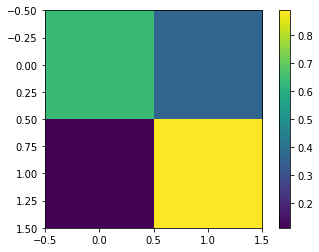

In [ ]:
print_score(logreg, Xtr1, ytr, Xts1, yts, train=True)
print_score(logreg, Xtr1, ytr, Xts1, yts, train=False)

<StemContainer object of 3 artists>

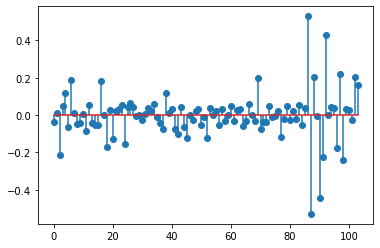

In [ ]:
W = logreg.coef_
W = W.ravel()
plt.stem(W,use_line_collection=True)

Accuracy on test data = 0.761424
[-3.83399220e-02  8.18755205e-03 -2.03346096e-01  4.72519039e-02
  1.11213149e-01 -6.12078182e-02  1.89255412e-01  1.33514684e-02
 -4.92565713e-02 -4.39053983e-02  7.22089624e-03 -8.72456352e-02
  4.72450893e-02 -3.98745209e-02 -5.07136574e-02 -5.47526903e-02
  1.80960344e-01 -1.24512400e-03 -1.64462469e-01  0.00000000e+00
 -1.51414898e-01 -3.71975005e-03  2.00397603e-03  2.01137452e-02
 -1.77717803e-01  1.53470000e-02  3.03720844e-02  1.54750342e-02
 -3.05304596e-02 -2.28631705e-02 -4.77848891e-02  0.00000000e+00
  3.42820522e-02  1.94164773e-02  5.25939175e-02 -1.43689422e-02
 -4.85953527e-02 -7.89204999e-02  1.20322042e-01  1.14902981e-02
  4.10359457e-02 -7.27331313e-02 -6.93395327e-02  4.75511679e-02
 -5.39126428e-02 -8.51043275e-02  0.00000000e+00 -1.85379705e-02
  2.01199825e-02  3.42881698e-02 -5.34514579e-02  0.00000000e+00
 -8.66943511e-02  4.18451078e-02  1.90090260e-03  2.91338638e-02
 -5.24022919e-02  6.62912988e-06 -6.75427796e-02  0.00000

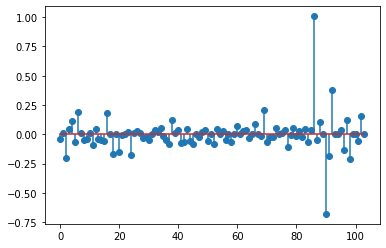

In [ ]:
reg = LogisticRegression(penalty = 'l1', solver='liblinear')
reg.fit(Xtr1, ytr)

yhat = reg.predict(Xts1)
acc = np.mean(yhat == yts)
print("Accuracy on test data = %f" % acc)

W = reg.coef_
W = W.ravel()
plt.stem(W, use_line_collection=True)
print(W)

I = np.argsort(np.abs(W))[-2:]
print(I)
print("The names of the factors where the magnitude of W[i] is largest are {} and {}".format(xnames[I[1]], xnames[I[0]]))

## SVM with optimization

In [ ]:
svc = svm.SVC(C=1.0,kernel='rbf',gamma=0.1)

svc.fit(Xtr1,ytr)

SVC(gamma=0.1)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    8687.0  8709.0       1.0    17396.0       17396.0
_______________________________________________
Confusion Matrix: 
 [[8687    0]
 [   0 8709]]

Test Result:
Accuracy Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy     macro avg  weighted avg
precision     1.000000     0.999482  0.999741      0.999741      0.999741
recall        0.999484     1.000000  0.999741      0.999742      0.999741
f1-score      0.999742     0.999741  0.999741      0.999741      0.999741
support    5810.000000  5788.000000  0.999741  11598.000000  11598.000000
_____________

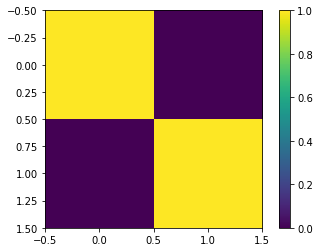

In [ ]:
print_score(svc, Xtr1, ytr, Xts1, yts, train=True)
print_score(svc, Xtr1, ytr, Xts1, yts, train=False)

In [ ]:
C_test = [0.1,1,10]
gam_test = [0.001,0.01,0.1]

nC = len(C_test)
ngam = len(gam_test)
acc = np.zeros((nC,ngam))

for j in range(nC):
    for k in range(ngam):
        svc = svm.SVC(C=C_test[j],kernel='rbf',gamma=gam_test[k])
        svc.fit(Xtr1,ytr)
        yhat_ts = svc.predict(Xts1)
        acc[j,k] = np.mean(yhat_ts == yts)

print(acc)

[[0.75797551 0.77082256 0.92705639]
 [0.75857907 0.91110536 0.99974133]
 [0.80651837 0.96921883 0.99974133]]


## Other Oversampling Models

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['fraud_oracle.csv']), skipinitialspace=True)

In [ ]:
df_onehot = df.copy()
df_onehot = pd.get_dummies(df_onehot, columns=['Month', 'DayOfWeek', 'Make', 
                                               'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 
                                               'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 
                                               'AgentType', 'BasePolicy'], prefix = ['Month', 'DayOfWeek', 
                                                                                     'Make', 'AccidentArea', 'DayOfWeekClaimed', 
                                                                                     'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 
                                                                                     'PolicyType', 'VehicleCategory', 'AgentType', 'BasePolicy'])

v = df_onehot['VehiclePrice'].replace(['less than 20000','20000 to 29000','30000 to 39000','40000 to 59000',
                                         '60000 to 69000','more than 69000'],[1,2,3,4,5,6])
df_onehot['VehiclePrice'] = v

d = df_onehot['Days_Policy_Accident'].replace(['none','1 to 7','8 to 15','15 to 30',
                                         'more than 30'],[0,4,12,23,50])
df_onehot['Days_Policy_Accident'] = d

d1 = df_onehot['Days_Policy_Claim'].replace(['none','8 to 15','15 to 30','more than 30'],[0,12,23,50])
df_onehot['Days_Policy_Claim'] = d1

p = df_onehot['PastNumberOfClaims'].replace(['none','1','2 to 4','more than 4'],[0,1,3,8])
df_onehot['PastNumberOfClaims'] = p

a = df_onehot['AgeOfVehicle'].replace(['new','2 years','3 years','4 years','5 years','6 years','7 years','more than 7',],[0,2,3,4,5,6,7,10])
df_onehot['AgeOfVehicle'] = a

a1 = df_onehot['AgeOfPolicyHolder'].replace(['16 to 17','18 to 20','21 to 25','26 to 30','31 to 35','36 to 40',
                                             '41 to 50','51 to 65','over 65',],[16,19,23,28,33,38,46,58,80])
df_onehot['AgeOfPolicyHolder'] = a1

p = df_onehot['PoliceReportFiled'].replace(['No','Yes'],[0,1])
df_onehot['PoliceReportFiled'] = p

w = df_onehot['WitnessPresent'].replace(['No','Yes'],[0,1])
df_onehot['WitnessPresent'] = w

n = df_onehot['NumberOfSuppliments'].replace(['none','1 to 2','3 to 5','more than 5'],[0,2,4,8])
df_onehot['NumberOfSuppliments'] = n

a = df_onehot['AddressChange_Claim'].replace(['no change','1 year','2 to 3 years','4 to 8 years','under 6 months'],[0,1,3,6,0.3])
df_onehot['AddressChange_Claim'] = a

n = df_onehot['NumberOfCars'].replace(['1 vehicle','2 vehicles','3 to 4','5 to 8','more than 8'],[1,2,4,7,10])
df_onehot['NumberOfCars'] = n

df_onehot.head()

,WeekOfMonth,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Make_Accura,...,DayOfWeekClaimed_Tuesday,DayOfWeekClaimed_Wednesday,MonthClaimed_0,MonthClaimed_Apr,MonthClaimed_Aug,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep,Sex_Female,Sex_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,Fault_Policy Holder,Fault_Third Party,PolicyType_Sedan - All Perils,PolicyType_Sedan - Collision,PolicyType_Sedan - Liability,PolicyType_Sport - All Perils,PolicyType_Sport - Collision,PolicyType_Sport - Liability,PolicyType_Utility - All Perils,PolicyType_Utility - Collision,PolicyType_Utility - Liability,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,6,0,1,12,300,1,50,50,0,3,28,0,0,0,1.0,4,1994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1,3,4,34,6,0,2,15,400,4,50,50,0,6,33,1,0,0,0.0,1,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
2,5,2,47,6,0,3,7,400,3,50,50,1,7,46,0,0,0,0.0,1,1994,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
3,2,1,65,2,0,4,4,400,2,50,50,1,10,58,1,0,8,0.0,1,1994,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,5,2,27,6,0,5,3,400,1,50,50,0,5,33,0,0,0,0.0,1,1994,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0


In [ ]:
xnames = df_onehot.columns.tolist()[:-1]
xnames.remove('FraudFound_P')

X = np.array(df_onehot[xnames])
y = np.array(df_onehot["FraudFound_P"])

Xtr,Xts,ytr,yts = train_test_split(X, y, test_size=0.3)

In [ ]:
xscal = StandardScaler()
Xtr1 = xscal.fit_transform(Xtr)
Xts1 = xscal.transform(Xts)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                 0      1  accuracy  macro avg  weighted avg
precision      1.0    1.0       1.0        1.0           1.0
recall         1.0    1.0       1.0        1.0           1.0
f1-score       1.0    1.0       1.0        1.0           1.0
support    10140.0  654.0       1.0    10794.0       10794.0
_______________________________________________
Confusion Matrix: 
 [[10140     0]
 [    0   654]]

Test Result:
Accuracy Score: 88.76%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.950669    0.159892  0.887592     0.555281      0.904686
recall        0.928850    0.219331  0.887592     0.574090      0.887592
f1-score      0.939633    0.184953  0.887592     0.562293      0.895749
support    4357.000000  269.000000  0.887592  4626.000000   4626.000000
___________________

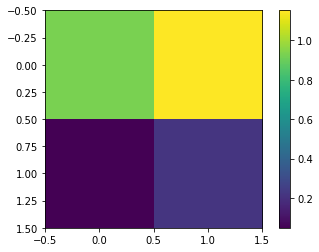

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN


# define pipeline
# oversample_model can be any of the following:

#oversample_model = SMOTE(sampling_strategy='auto', k_neighbors=5) # these parameters can be tuned
oversample_model = BorderlineSMOTE(sampling_strategy='auto', k_neighbors=5, m_neighbors=5)
#oversample_model = SVMSMOTE(sampling_strategy='auto', k_neighbors=5, m_neighbors=5)
#oversample_model = ADASYN(sampling_strategy='auto', n_neighbors=5)

steps = [('oversample', oversample_model), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
pipeline.fit(Xtr1, ytr)

# evaluate pipeline
print_score(pipeline, Xtr1, ytr, Xts1, yts, train=True)
print_score(pipeline, Xtr1, ytr, Xts1, yts, train=False)